In [1]:
# matplotlib 한글 깨짐 방지
# https://velog.io/@redgreen/Linux-linux%EC%97%90%EC%84%9C-Matplotlib-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0

import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [16]:
# import pandas as pd
# import re

# # CSV 파일 읽기
# summ_df = pd.read_csv('/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3.csv')

# columns = ['realUp', 'stock', 'title', 'summ_context_len', 'ori_context_len', 'diff_len']
# temp_df = pd.DataFrame(columns=columns)

# for i in range(len(summ_df)):
#     temp_df.loc[i, 'realUp'] = summ_df.loc[i, 'realUp']
#     temp_df.loc[i, 'stock'] = summ_df.loc[i, 'stock']
#     temp_df.loc[i, 'title'] = summ_df.loc[i, 'title']
#     temp_df.loc[i, 'summ_context_len'] = len(summ_df.loc[i, 'summ_context'])
#     temp_df.loc[i, 'ori_context_len'] = len(summ_df.loc[i, 'ori_context'])
#     temp_df.loc[i, 'diff_len'] =  temp_df.loc[i, 'summ_context_len'] - temp_df.loc[i, 'ori_context_len']
# temp_df.tail()


# 개선된 코드
import pandas as pd

# CSV 파일 읽기
summ_df = pd.read_csv('/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-1.csv')

# 필요한 열만 선택하여 새로운 데이터프레임 생성
temp_df = pd.DataFrame()

# 각 열에 대해 apply 사용
temp_df['realUp'] = summ_df['realUp']
# temp_df['stock'] = summ_df['stock']
# temp_df['title'] = summ_df['title']
temp_df['summ_context_len'] = summ_df['summ_context'].apply(len)
# temp_df['ori_context_len'] = summ_df['ori_context'].apply(len)

# diff_len 계산
# temp_df['diff_len'] = temp_df['summ_context_len'] - temp_df['ori_context_len']

# 결과 확인
display(temp_df.tail())

,realUp,summ_context_len
2699,0,251
2700,1,224
2701,0,174
2702,0,169
2703,0,166


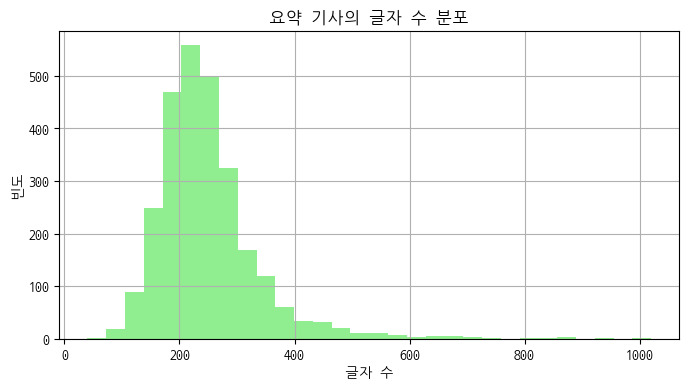

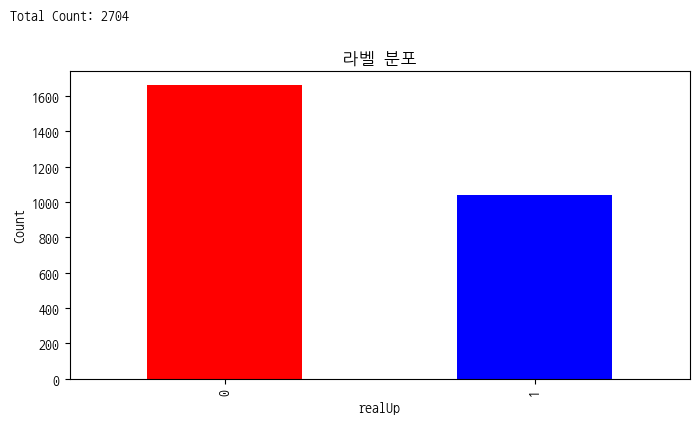

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 원본 기사 글자 수 분포
# plt.figure(figsize=(8, 4))
# summ_df['ori_context'].str.len().hist(bins=30, color='pink')  # 막대 색상 지정
# plt.title('원본 기사 글자 수 분포')
# plt.xlabel('글자 수')
# plt.ylabel('빈도')
# plt.show()

# 요약 기사 글자 수 분포
plt.figure(figsize=(8, 4))
summ_df['summ_context'].str.len().hist(bins=30, color='lightgreen')  # 막대 색상 지정
plt.title('요약 기사의 글자 수 분포')
plt.xlabel('글자 수')
plt.ylabel('빈도')
plt.show()


# 라벨 분포
value_counts = summ_df['realUp'].value_counts()
total_count = value_counts.sum()
plt.figure(figsize=(8, 4))
value_counts.plot(kind='bar', color=['red', 'blue'])  # 막대 색상 지정
plt.title('라벨 분포')
plt.xlabel('realUp')
plt.ylabel('Count')
# 총 카운트 수 표시
plt.text(0, 1.2, f'Total Count: {total_count}', transform=plt.gca().transAxes, ha='center', va='top')
plt.show()


In [4]:
summ_df['realUp'].value_counts()

realUp
0    1661
1    1043
Name: count, dtype: int64

In [5]:
for i in range(len(temp_df)):
    if temp_df.loc[i, 'summ_context_len'] < 100 : # 뉴스 내용이 너무 적어서 학습에 방해될 것 3개
        print(temp_df.loc[i, 'summ_context_len'])

90
75
92
89
40
93
99
84
93
59
79
87


In [6]:
import pandas as pd

temp_df = pd.DataFrame()
temp_df['realUp'] = summ_df[['realUp']]
temp_df['summ_context'] = summ_df[['summ_context']]

# summ_context의 길이가 00 미만인 행 필터링
filtered_df = temp_df[temp_df['summ_context'].str.len() <100]

# 결과 출력
print(filtered_df) #60 미만 부터 이유가 없음

# 결과를 CSV 파일로 저장
filtered_df.to_csv('temp.csv', index=False)

      realUp                                       summ_context
104        0  코스닥지수가 외국인 순매수에 힘입어 일 연속 상승세를 이어가며 선을 회복했습니다 의...
151        0  정부의 북한 조림 사업 추진 계획이 기대되면서 조림 관련 종목이 초반 상승세를 보였...
210        0  한국 코스피지수는 외국인 순매수로 인해 상승하여 로 마감하였습니다 삼성전자 하이닉스...
368        0  휴네시온 이 상한가를 기록 중이며 현재 원에 거래되고 있습니다 최근 거래량이 급증했...
562        0           네오오토 장 시작부터 높은 상승세 보여 오전 시 분 현재 전일 대비 증가
739        0  케이엠제약이 시작부터 강한 상승세를 보이며 장중 최고 까지 올랐다가 현재는 상승한 ...
1141       1  한국거래소 코스닥시장본부가 유니온커뮤니티의 주가 급등에 대해 조회공시를 요구하고 있...
1143       1  휴맥스는 연결 기준으로 올해 분기 영업이익이 지난해 동기 대비 감소했다고 공시했습니...
1189       0  오늘 코스피 지수는 외국인 매도에도 불구하고 개인이 꾸준히 순매수하면서 상승해 에 ...
1396       1  한국 코스닥지수 상승 외국인 및 기관투자자 동반 매수세 오락 문화 관련주가 강세 키...
1707       0  주요 내용 요약 코스닥 지수가 거래일 만에 하락하여 개인 투자자의 순매수로 간신히 ...
2009       0  일 코스피 지수 전 거래일 대비 상승하며 로 마감 외국인 및 기관이 매수를 이어가며...


In [7]:
# summ_context의 길이가 60 미만인 행 삭제
temp_df = temp_df[temp_df['summ_context'].str.len() >= 100]
print(temp_df.head())

# 결과를 CSV 파일로 저장
temp_df.to_csv('./datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-2.csv', index=False)

   realUp                                       summ_context
0       1  국내 증시는 긍정적인 시장 전망과 개인 투자자 및 외국인의 매수세로 인해 연초 상승...
1       1  우리기술투자 가 가상화폐 거래소인 업비트를 운영하는 두나무 지분 가치가 주목받고 있...
2       1  뉴프라이드 는 미국 대마초 판매 합법화에 따라 코스닥 시장에서 상승세를 보이고 있습...
3       0  요약하자면 코스피가 연속 상승세를 이어가며 사상 최고치인 선을 향해 가고 있고 코스...
4       1  코스닥지수는 바이오 제약주들의 차익 실현 매물로 인해 하락세를 보였습니다 기관은 대...


In [8]:
import re
temp_df = pd.read_csv('./datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-2.csv')

# 한글만 남기고 나머지 제거하는 함수 정의
def keep_hangul(text):
    return ' '.join(re.findall(r'[가-힣]+', text))

# summ_context 열에 한글만 남기기
temp_df['summ_context'] = temp_df['summ_context'].apply(keep_hangul)

# 결과 출력
print(temp_df)

# 결과를 CSV 파일로 저장
temp_df.to_csv('./datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-3.csv', index=False)

      realUp                                       summ_context
0          1  국내 증시는 긍정적인 시장 전망과 개인 투자자 및 외국인의 매수세로 인해 연초 상승...
1          1  우리기술투자 가 가상화폐 거래소인 업비트를 운영하는 두나무 지분 가치가 주목받고 있...
2          1  뉴프라이드 는 미국 대마초 판매 합법화에 따라 코스닥 시장에서 상승세를 보이고 있습...
3          0  요약하자면 코스피가 연속 상승세를 이어가며 사상 최고치인 선을 향해 가고 있고 코스...
4          1  코스닥지수는 바이오 제약주들의 차익 실현 매물로 인해 하락세를 보였습니다 기관은 대...
...      ...                                                ...
2687       0  해당 기사는 코스의 지수가 미국 금리 하락 기대가 줄어들고 이른 폭염으로 인해 빙과...
2688       1  코스닥 지수는 외국인 매도로 인해 거래일 만에 하락 마감했습니다 코스닥은 오후 한때...
2689       0  코스닥 지수가 상승세를 보이며 전거래일 대비 오른 로 거래 중입니다 나스닥발 훈풍으...
2690       0  라씨로는 기반 주식 분석 정보를 제공하는 전자신문 증권 정보 애플리케이션입니다 플레...
2691       0  증권은 삼양식품의 주요 고객사인 식품소재 기업 에스앤디 가 불닭볶음면 열풍으로 실적...

[2692 rows x 2 columns]


In [9]:
import torch
from transformers import PreTrainedTokenizerFast # KoGPT2
from transformers import BertTokenizer # KoBERT
from konlpy.tag import Okt # okt


# KoGPT 모델에 맞는 토크나이저 로드
tokenizer_KoGPT = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
# KoBERT 모델에 맞는 토크나이저 로드
tokenizer_KoBERT = BertTokenizer.from_pretrained("kykim/bert-kor-base")
# OKT
okt = Okt()

# 토큰화할 텍스트
text = "안녕하세요 오늘의 뉴스 요약입니다."

# 텍스트를 토큰화
tokens_KoGPT = tokenizer_KoGPT.tokenize(text)
tokens_KoBERT =tokenizer_KoBERT.tokenize(text)

# 토큰 ID 변환
token_ids_KoGPT = tokenizer_KoGPT.convert_tokens_to_ids(tokens_KoGPT)
token_ids_KoBERT =tokenizer_KoBERT.convert_tokens_to_ids(tokens_KoBERT)

# 결과 출력
print("원본 텍스트:", text)
print("KoGPT2 토큰화된 결과:", tokens_KoGPT)
print("KoBERT 토큰화된 결과:", tokens_KoBERT)
print("Okt_nouns 토큰화된 결과:", okt.nouns(text))
print("Okt_morphs 토큰화된 결과:", okt.morphs(text))
print("KoGPT2 토큰 ID:", token_ids_KoGPT)
print("KoBERT 토큰 ID:", token_ids_KoBERT)

# 토큰 ID를 다시 텍스트로 변환
decoded_text_KoGPT = tokenizer_KoGPT.decode(token_ids_KoGPT)
decoded_text_KoBERT = tokenizer_KoBERT.decode(token_ids_KoBERT)
print("KoGPT2 디코딩된 텍스트:", decoded_text_KoGPT)
print("KoBERT 디코딩된 텍스트:", decoded_text_KoBERT)

# 원본 텍스트: 안녕하세요, 오늘의 뉴스 요약입니다.
# KoGPT2 토큰화된 결과: ['▁안녕', '하', '세', '요,', '▁오늘의', '▁뉴스', '▁요약', '입니다.']
# KoBERT 토큰화된 결과: ['안녕하세요', ',', '오늘의', '뉴스', '요약', '##입니다', '.']
# Okt_nouns 토큰화된 결과: ['오늘', '뉴스', '요약']
# Okt_morphs 토큰화된 결과: ['안녕하세요', ',', '오늘', '의', '뉴스', '요약', '입니다', '.']
# KoGPT2 토큰 ID: [25906, 8702, 7801, 13704, 34461, 26506, 17669, 21154]
# KoBERT 토큰 ID: [16453, 2014, 17622, 21585, 26539, 13992, 2016]
# KoGPT2 디코딩된 텍스트: 안녕하세요, 오늘의 뉴스 요약입니다.
# KoBERT 디코딩된 텍스트: 안녕하세요, 오늘의 뉴스 요약입니다.

# 토큰화는 Okt_nouns가 좋을것 같다.

/home/alpaco/anaconda3/envs/moon_mys/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


원본 텍스트: 안녕하세요 오늘의 뉴스 요약입니다.
KoGPT2 토큰화된 결과: ['▁안녕', '하', '세', '요', '▁오늘의', '▁뉴스', '▁요약', '입니다.']
KoBERT 토큰화된 결과: ['안녕하세요', '오늘의', '뉴스', '요약', '##입니다', '.']
Okt_nouns 토큰화된 결과: ['오늘', '뉴스', '요약']
Okt_morphs 토큰화된 결과: ['안녕하세요', '오늘', '의', '뉴스', '요약', '입니다', '.']
KoGPT2 토큰 ID: [25906, 8702, 7801, 8084, 34461, 26506, 17669, 21154]
KoBERT 토큰 ID: [16453, 17622, 21585, 26539, 13992, 2016]
KoGPT2 디코딩된 텍스트: 안녕하세요 오늘의 뉴스 요약입니다.
KoBERT 디코딩된 텍스트: 안녕하세요 오늘의 뉴스 요약입니다.


## Okt

In [10]:
import pandas as pd
from collections import Counter  # Counter 클래스 임포트
from konlpy.tag import Okt

# Okt 토크나이저 로드
okt = Okt()

# summ_context 열에 Okt 토크나이저 적용 및 1글자 이하의 토큰 삭제
temp_df['okt_tokenized'] = temp_df['summ_context'].apply(
    lambda x: [word for word in okt.nouns(x) if len(word) > 1]  # 1글자 이하 토큰 필터링
)

# 토큰화 데이터프레임 저장
temp_df.to_csv('./datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-4.csv')
# 저장 완료 메시지 출력
print("okt nouns 처리한 파일이 'naver_news_origin_duplicates_summ3-4.csv'로 저장되었습니다.")


okt nouns 처리한 파일이 'naver_news_origin_duplicates_summ3-4.csv'로 저장되었습니다.


In [ ]:
# # 모든 토큰을 하나의 리스트로 결합
# all_tokens = [token for sublist in temp_df['okt_tokenized'] for token in sublist]

# # 단어 빈도수 계산
# word_counts = Counter(all_tokens)

# # 빈도수 내림차순 정렬
# sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# # 결과를 데이터프레임으로 변환
# word_freq_df = pd.DataFrame(sorted_word_counts, columns=['단어', '빈도수'])

# # 결과를 CSV 파일로 저장
# word_freq_df.to_csv('word_frequency.csv', index=False)

# # 저장 완료 메시지 출력
# print("단어 빈도수 파일이 'word_frequency.csv'로 저장되었습니다.")

## TF-IDF (희소문제, 단어 순서 무시, 문맥 정보 부족, 문서 길이 편향, 어휘 확장성 부족) 사용 불가

In [39]:
import pandas as pd
import ast  # 문자열을 리스트로 변환하기 위한 모듈
from sklearn.feature_extraction.text import TfidfVectorizer

# 문자열 형태의 리스트를 실제 리스트로 변환
temp_df['okt_tokenized'] = temp_df['okt_tokenized'].apply(ast.literal_eval)

# 토큰 리스트를 문자열로 변환
temp_df['text'] = temp_df['okt_tokenized'].apply(lambda x: ' '.join(x))

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(temp_df['text'])

# TF-IDF 결과를 데이터프레임으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# 결과 출력
print("TF-IDF 데이터프레임:")
print(tfidf_df)


import pickle

# TF-IDF 벡터화기 저장
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# TF-IDF 매트릭스 저장 (필요한 경우)
tfidf_df.to_csv('tfidf_embeddings.csv', index=False)

TF-IDF 데이터프레임:
       가가        가격   가결   가공  가공업   가구  가까이   가능       가능성   가닥  ...   희소  \
0     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
1     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.100542  0.0  ...  0.0   
2     0.0  0.113091  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
3     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
4     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
...   ...       ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...   
2687  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
2688  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
2689  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
2690  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   
2691  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0   

      희소식  희토류   히터   히트  히트텍  힌남노   힐링  힘겨루기   

In [41]:
import pandas as pd
import pickle

# 새로운 데이터 예시
new_data = ["안녕하세요 나는 문영식 입니다 벡터화 테스트 입니다", "어쩔탱 저쩔탱 쿠쿠르삥뽕 안물 안궁"]

# TF-IDF 벡터화기 로드
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

# 새로운 데이터를 DataFrame으로 변환
new_df = pd.DataFrame(new_data, columns=['text'])

# 새로운 데이터에 대해 TF-IDF 벡터화
new_tfidf_matrix = loaded_vectorizer.transform(new_df['text'])

# TF-IDF 결과를 데이터프레임으로 변환
new_tfidf_df = pd.DataFrame(new_tfidf_matrix.toarray(), columns=loaded_vectorizer.get_feature_names_out())

# 결과 출력
print("새로운 데이터에 대한 TF-IDF 데이터프레임:")
print(new_tfidf_df)

# 필요시 새로운 TF-IDF 결과를 CSV 파일로 저장
new_tfidf_df.to_csv('new_tfidf_embeddings.csv', index=False)


새로운 데이터에 대한 TF-IDF 데이터프레임:
    가가   가격   가결   가공  가공업   가구  가까이   가능  가능성   가닥  ...   희소  희소식  희토류   히터  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    히트  히트텍  힌남노   힐링  힘겨루기   힘스  
0  0.0  0.0  0.0  0.0   0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0  0.0  

[2 rows x 7945 columns]


## Ko_BERT로 임베딩해보기

In [66]:
import pandas as pd
from transformers import AutoTokenizer

# 데이터 로드
file_path = '/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-3.csv'
df = pd.read_csv(file_path)

# 필요한 컬럼만 사용
df = df[['summ_context', 'realUp']]

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("snunlp/KR-FinBert-SC")

# 토큰화 예제
def tokenize_sentences(sentences):
    # 문장들을 토큰화
    encodings = tokenizer(
        sentences,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    return encodings

# 예시 문장 토큰화
sample_sentences = df['summ_context'].tolist()[:5]  # 첫 5개 문장 예시
tokenized_output = tokenize_sentences(sample_sentences)

# 결과 출력
print("토큰화 결과:")
print(tokenized_output)


/home/alpaco/anaconda3/envs/moon_mys/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


토큰화 결과:
{'input_ids': tensor([[    2,  8982,  3933,  9415, 14866,  8535,  9246, 11608,  5138,  9154,
          9389,  5167,  2953, 10464,  5105, 14295, 11539, 10999,  3599,  5817,
         10695, 10026, 14589,  9594, 19509,  5284, 11329,  5816,  8667,  9767,
          3683,  8932,  8961,  9445,  1998,  5238, 13322,  8513,  9000,  9566,
          5310,  5138,  3683, 10741,  1920, 19501, 17821,  9594,  3824,  5345,
          9396,  5351,  5284, 17048, 18499, 15905,  8454,  1932, 11000, 17373,
          5072, 10983, 10464,  5019,  3322,  5550, 10460, 12711,  9255,  8538,
         10624,  8465,  3682, 17996,  1932, 13658,  5067, 11953,  9602, 12424,
          5051,  8486, 14866,  8535, 11608,  5008,  9751,  8455,  9594,     3,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0, 

ko_bert 토크나이저를 쓰면 임베딩 잘 됨.

## 핀 버트 토크나이저 + 로지스틱리그레션

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# 데이터 로드
file_path = '/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-3.csv'
df = pd.read_csv(file_path)

# 필요한 컬럼만 사용
df = df[['summ_context', 'realUp']]

# 데이터셋을 훈련셋과 테스트셋으로 분리
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("snunlp/KR-FinBert")

# 토큰화 및 패딩 함수 정의
def tokenize_and_pad(sentences, max_length=512):
    encodings = tokenizer(
        sentences,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    return encodings['input_ids']

# 훈련 및 테스트 데이터 토큰화
X_train = tokenize_and_pad(train_df['summ_context'].tolist())
X_test = tokenize_and_pad(test_df['summ_context'].tolist())
y_train = train_df['realUp'].values
y_test = test_df['realUp'].values

# 텐서를 NumPy 배열로 변환
X_train_np = X_train.detach().numpy()
X_test_np = X_test.detach().numpy()

# 로지스틱리그레션 모델은 피쳐를 418 받으므로 PCA를 사용하여 피처 수를 418개로 축소
pca = PCA(n_components=418)
X_train_reduced = pca.fit_transform(X_train_np)
X_test_reduced = pca.transform(X_test_np)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_reduced, y_train)

# 예측
y_pred = model.predict(X_test_reduced)

# 결과 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"정확도: {accuracy:.4f}")
print("분류 리포트:\n", report)


# 정확도: 0.5640
# 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.60      0.78      0.67       314
#            1       0.46      0.27      0.34       225

#     accuracy                           0.56       539
#    macro avg       0.53      0.52      0.51       539
# weighted avg       0.54      0.56      0.53       539


## FinBERT


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
file_path = '/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-3.csv'
df = pd.read_csv(file_path)

# 필요한 컬럼만 사용
df = df[['summ_context', 'realUp']]

# 데이터셋을 훈련셋과 테스트셋으로 분리
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# 토크나이저 및 모델 로드
tokenizer = BertTokenizer.from_pretrained("snunlp/KR-FinBert")
model = BertForSequenceClassification.from_pretrained("snunlp/KR-FinBert", num_labels=2)

# 데이터셋 준비
train_encodings = tokenizer(train_df['summ_context'].tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_df['summ_context'].tolist(), truncation=True, padding=True, max_length=512)

# PyTorch Dataset 클래스 정의
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, y_train)
test_dataset = NewsDataset(test_encodings, y_test)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,  # 로그를 더 자주 출력하도록 설정
    evaluation_strategy="steps",  # 평가 전략을 설정
    eval_steps=100,  # 평가를 위한 스텝 수
)


from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# 평가지표 함수 정의
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='binary')
    acc = accuracy_score(labels, pred)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# 조기 중단 콜백 추가
from transformers import EarlyStoppingCallback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=3)

# Trainer를 통한 모델 훈련
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],  # 조기 중단 콜백 추가
)

trainer.train()

# 예측 및 평가
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"정확도: {accuracy:.4f}")
print("분류 리포트:\n", report)


# Step	Training Loss	Validation Loss	Accuracy	F1	Precision	Recall
# 100	0.673700	0.682647	0.580705	0.058333	0.466667	0.031111
# 200	0.672600	0.738892	0.582560	0.000000	0.000000	0.000000
# 300	0.655900	0.697149	0.573284	0.361111	0.481481	0.288889
# 400	0.627100	0.747127	0.564007	0.192440	0.424242	0.124444
# 500	0.434400	0.982481	0.554731	0.329609	0.443609	0.262222
# 600	0.289800	1.911037	0.517625	0.389671	0.412935	0.368889
# 700	0.190600	2.163080	0.556586	0.366048	0.453947	0.306667
# 800	0.120500	2.438479	0.541744	0.384040	0.437500	0.342222
# 900	0.075200	2.769468	0.551020	0.434579	0.458128	0.413333
# 1000	0.040300	3.182628	0.560297	0.328612	0.453125	0.257778
# 1100	0.053500	3.084835	0.530612	0.423690	0.434579	0.413333
# 1200	0.019700	3.810341	0.552876	0.244514	0.414894	0.173333
# 1300	0.017800	3.791117	0.545455	0.350133	0.434211	0.293333
# 1400	0.030000	3.805593	0.551020	0.366492	0.445860	0.311111
# 1500	0.048100	3.526658	0.551020	0.431925	0.457711	0.408889
# 1600	0.003800	3.807347	0.536178	0.407583	0.436548	0.382222
# 1700	0.002800	3.892785	0.551020	0.473913	0.463830	0.484444
# 1800	0.014300	3.804846	0.558442	0.466368	0.470588	0.462222
# 1900	0.016100	3.954975	0.538033	0.430206	0.443396	0.417778
# 2000	0.006300	4.082551	0.504638	0.483559	0.428082	0.555556
# 2100	0.001000	4.174303	0.536178	0.338624	0.418301	0.284444
# 2200	0.000200	4.217677	0.530612	0.412993	0.432039	0.395556
# 2300	0.011200	4.336666	0.517625	0.462810	0.432432	0.497778
# 2400	0.001000	4.378465	0.532468	0.444934	0.441048	0.448889
# 2500	0.001800	4.347987	0.541744	0.434783	0.448113	0.422222
# 2600	0.000300	4.394334	0.541744	0.399027	0.440860	0.364444
# 2700	0.009800	4.398994	0.549165	0.362205	0.442308	0.306667
# 2800	0.000000	4.432846	0.556586	0.359249	0.452703	0.297778
# 2900	0.000100	4.375212	0.536178	0.436937	0.442922	0.431111

## okt + 핀버트토크나이저 + 로지스틱리그레션

In [23]:
file_path = '/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-4.csv'
temp_df = pd.read_csv(file_path)

In [36]:
# okt 토큰화 된 리스트 -> 문자열로 전환
temp_df['okt_tokenized_str'] = temp_df['okt_tokenized'].apply(lambda x: ''.join(x).strip('[]').replace(',', '').replace('\'', ''))

# 토큰화 데이터프레임 저장
temp_df.to_csv('./datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-5.csv')

# 저장 완료 메시지 출력
print("처리한 파일이 'naver_news_origin_duplicates_summ3-5.csv'로 저장되었습니다.")

처리한 파일이 'naver_news_origin_duplicates_summ3-5.csv'로 저장되었습니다.


In [38]:
import pandas as pd
import torch
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# 데이터 로드
file_path = '/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-5.csv'
df = pd.read_csv(file_path)

# 필요한 컬럼만 사용
df = df[['okt_tokenized_str', 'realUp']]

# 데이터셋을 훈련셋과 테스트셋으로 분리
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("snunlp/KR-FinBert")

# 토큰화 및 패딩 함수 정의
def tokenize_and_pad(sentences, max_length=512):
    encodings = tokenizer(
        sentences,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    return encodings['input_ids']

# 훈련 및 테스트 데이터 토큰화
X_train = tokenize_and_pad(train_df['okt_tokenized_str'].tolist())
X_test = tokenize_and_pad(test_df['okt_tokenized_str'].tolist())
y_train = train_df['realUp'].values
y_test = test_df['realUp'].values

# 텐서를 NumPy 배열로 변환
X_train_np = X_train.detach().numpy()
X_test_np = X_test.detach().numpy()

# 로지스틱리그레션 모델은 피쳐를 418 받으므로 PCA를 사용하여 피처 수를 418개로 축소
pca = PCA(n_components=418)
X_train_reduced = pca.fit_transform(X_train_np)
X_test_reduced = pca.transform(X_test_np)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_reduced, y_train)

# 예측
y_pred = model.predict(X_test_reduced)

# 결과 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"정확도: {accuracy:.4f}")
print("분류 리포트:\n", report)

# finbert 토크나이저만 적용한 점수
# 정확도: 0.5640
# 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.60      0.78      0.67       314
#            1       0.46      0.27      0.34       225

#     accuracy                           0.56       539
#    macro avg       0.53      0.52      0.51       539
# weighted avg       0.54      0.56      0.53       539

# Okt + finbert토크나이저 적용한 점수 (더 안좋아졌다.)
# 정확도와 프리시전은 미미하게 낮아지고, 0에 대한 리콜과 f1은 오르고 1에대한 점수는 대폭 낮아졌다. 
# 정확도: 0.5529
# 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.58      0.86      0.69       314
#            1       0.39      0.12      0.19       225

#     accuracy                           0.55       539
#    macro avg       0.48      0.49      0.44       539
# weighted avg       0.50      0.55      0.48       539

# 결론 : 0이라고 예측을 많이하고 

/home/alpaco/anaconda3/envs/moon_mys/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


정확도: 0.5529
분류 리포트:
               precision    recall  f1-score   support

           0       0.58      0.86      0.69       314
           1       0.39      0.12      0.19       225

    accuracy                           0.55       539
   macro avg       0.48      0.49      0.44       539
weighted avg       0.50      0.55      0.48       539



/home/alpaco/anaconda3/envs/moon_mys/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## XG부스팅

In [42]:
from xgboost import XGBClassifier
import pandas as pd
import torch
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# 데이터 로드
file_path = '/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-5.csv'
df = pd.read_csv(file_path)

# 필요한 컬럼만 사용
df = df[['summ_context', 'realUp']]

# 데이터셋을 훈련셋과 테스트셋으로 분리
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("snunlp/KR-FinBert")

# 토큰화 및 패딩 함수 정의
def tokenize_and_pad(sentences, max_length=512):
    encodings = tokenizer(
        sentences,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    return encodings['input_ids']

# 훈련 및 테스트 데이터 토큰화
X_train = tokenize_and_pad(train_df['summ_context'].tolist())
X_test = tokenize_and_pad(test_df['summ_context'].tolist())
y_train = train_df['realUp'].values
y_test = test_df['realUp'].values

# 텐서를 NumPy 배열로 변환
X_train_np = X_train.detach().numpy()
X_test_np = X_test.detach().numpy()

# 로지스틱리그레션 모델은 피쳐를 418 받으므로 PCA를 사용하여 피처 수를 418개로 축소
pca = PCA(n_components=418)
X_train_reduced = pca.fit_transform(X_train_np)
X_test_reduced = pca.transform(X_test_np)

# XGBoost 모델 학습
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_reduced, y_train)

# 예측
xgb_y_pred = xgb_model.predict(X_test_reduced)

# 결과 평가
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)

print(f"XGBoost 정확도: {xgb_accuracy:.4f}")
print("XGBoost 분류 리포트:\n", xgb_report)


# finbert토크나이저 + 로지스틱리그레션  적용한 점수
# 정확도: 0.5640
# 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.60      0.78      0.67       314
#            1       0.46      0.27      0.34       225

#     accuracy                           0.56       539
#    macro avg       0.53      0.52      0.51       539
# weighted avg       0.54      0.56      0.53       539

# Okt + finbert토크나이저 + 로지스틱리그레션 적용한 점수 (더 안좋아졌다.)
# 정확도와 프리시전은 미미하게 낮아지고, 0에 대한 리콜과 f1은 오르고 1에대한 점수는 대폭 낮아졌다. 
# 정확도: 0.5529
# 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.58      0.86      0.69       314
#            1       0.39      0.12      0.19       225

#     accuracy                           0.55       539
#    macro avg       0.48      0.49      0.44       539
# weighted avg       0.50      0.55      0.48       539

# finbert토크나이저 + XG부스팅
# XGBoost 정확도: 0.5380
# XGBoost 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.58      0.79      0.67       314
#            1       0.39      0.18      0.25       225

#     accuracy                           0.54       539
#    macro avg       0.48      0.49      0.46       539
# weighted avg       0.50      0.54      0.49       539

/home/alpaco/anaconda3/envs/moon_mys/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


XGBoost 정확도: 0.5380
XGBoost 분류 리포트:
               precision    recall  f1-score   support

           0       0.58      0.79      0.67       314
           1       0.39      0.18      0.25       225

    accuracy                           0.54       539
   macro avg       0.48      0.49      0.46       539
weighted avg       0.50      0.54      0.49       539



In [ ]:
from xgboost import XGBClassifier
import pandas as pd
import torch
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# 데이터 로드
file_path = '/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-5.csv'
df = pd.read_csv(file_path)

# 필요한 컬럼만 사용
df = df[['okt_tokenized_str', 'realUp']]

# 데이터셋을 훈련셋과 테스트셋으로 분리
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("snunlp/KR-FinBert")

# 토큰화 및 패딩 함수 정의
def tokenize_and_pad(sentences, max_length=512):
    encodings = tokenizer(
        sentences,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    return encodings['input_ids']

# 훈련 및 테스트 데이터 토큰화
X_train = tokenize_and_pad(train_df['okt_tokenized_str'].tolist())
X_test = tokenize_and_pad(test_df['okt_tokenized_str'].tolist())
y_train = train_df['realUp'].values
y_test = test_df['realUp'].values

# 텐서를 NumPy 배열로 변환
X_train_np = X_train.detach().numpy()
X_test_np = X_test.detach().numpy()

# 로지스틱리그레션 모델은 피쳐를 418 받으므로 PCA를 사용하여 피처 수를 418개로 축소
pca = PCA(n_components=418)
X_train_reduced = pca.fit_transform(X_train_np)
X_test_reduced = pca.transform(X_test_np)

# XGBoost 모델 학습
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_reduced, y_train)

# 예측
xgb_y_pred = xgb_model.predict(X_test_reduced)

# 결과 평가
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)

print(f"XGBoost 정확도: {xgb_accuracy:.4f}")
print("XGBoost 분류 리포트:\n", xgb_report)


# finbert토크나이저 + 로지스틱리그레션  적용한 점수
# 정확도: 0.5640
# 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.60      0.78      0.67       314
#            1       0.46      0.27      0.34       225

#     accuracy                           0.56       539
#    macro avg       0.53      0.52      0.51       539
# weighted avg       0.54      0.56      0.53       539

# Okt + finbert토크나이저 + 로지스틱리그레션
# 정확도: 0.5529
# 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.58      0.86      0.69       314
#            1       0.39      0.12      0.19       225

#     accuracy                           0.55       539
#    macro avg       0.48      0.49      0.44       539
# weighted avg       0.50      0.55      0.48       539

# finbert토크나이저 + XG부스팅
# XGBoost 정확도: 0.5380
# XGBoost 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.58      0.79      0.67       314
#            1       0.39      0.18      0.25       225

#     accuracy                           0.54       539
#    macro avg       0.48      0.49      0.46       539
# weighted avg       0.50      0.54      0.49       539

# Okt + finbert토크나이저 + XG부스팅
# XGBoost 정확도: 0.5603
# XGBoost 분류 리포트:
#                precision    recall  f1-score   support

#            0       0.58      0.84      0.69       314
#            1       0.43      0.16      0.24       225

#     accuracy                           0.56       539
#    macro avg       0.51      0.50      0.46       539
# weighted avg       0.52      0.56      0.50       539

/home/alpaco/anaconda3/envs/moon_mys/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


XGBoost 정확도: 0.5603
XGBoost 분류 리포트:
               precision    recall  f1-score   support

           0       0.58      0.84      0.69       314
           1       0.43      0.16      0.24       225

    accuracy                           0.56       539
   macro avg       0.51      0.50      0.46       539
weighted avg       0.52      0.56      0.50       539



## ollama RAG로 어찌 해볼순 없을까..?

In [1]:
import pandas as pd

# 데이터 로드
file_path = '/home/alpaco/mys/projects/news/datas/네이버_뉴스기사/naver_news_origin_duplicates_summ3-3.csv'
df = pd.read_csv(file_path)

# 필요한 컬럼만 사용
df = df[['summ_context', 'realUp']]


In [2]:
df['summ_context'][0]

'국내 증시는 긍정적인 시장 전망과 개인 투자자 및 외국인의 매수세로 인해 연초 상승세를 보이고 있습니다 코스피와 코스닥 모두 지난해 월 이후 최고치를 경신했으며 정부 정책 기대감과 월 효과 가 시장을 지지하고 있습니다 제약 바이오와 소프트웨어 부문에서 강세가 나타나고 있으며 외국인은 순매수로 전환되었습니다 전문가들은 원화의 강세에도 불구하고 수출 수요에 대한 긍정적인 전망을 유지하고 있습니다'

In [3]:
# # 임베딩 예시
# import ollama
# exmaple_embeddings = ollama.embeddings(
#   prompt=df['summ_context'][0],
#   model='mxbai-embed-large',
# )
# print(exmaple_embeddings)

In [4]:
# 임베딩 함수화
import ollama
def get_embedding(prompt, model="mxbai-embed-large"):
    response = ollama.embeddings(prompt=prompt, model=model)
    return response["embedding"]

In [5]:
# 컬랙션 생성
import chromadb

client = chromadb.Client()

collections = client.list_collections()
wiki_exists = "summ_context" in [collection.name for collection in collections] # 컬렉션 존재 확인

if wiki_exists:
  client.delete_collection("summ_context")
  
collection = client.create_collection(name="summ_context")

In [7]:
# 문서 임베딩하고 컬렉션에 저장
for i, d in enumerate(df['summ_context']):
  embedding = get_embedding(d)
  collection.add(
    ids=[str(i)],
    embeddings=[embedding],
    documents=[d]
  )

In [8]:
df['summ_context'][0]

'국내 증시는 긍정적인 시장 전망과 개인 투자자 및 외국인의 매수세로 인해 연초 상승세를 보이고 있습니다 코스피와 코스닥 모두 지난해 월 이후 최고치를 경신했으며 정부 정책 기대감과 월 효과 가 시장을 지지하고 있습니다 제약 바이오와 소프트웨어 부문에서 강세가 나타나고 있으며 외국인은 순매수로 전환되었습니다 전문가들은 원화의 강세에도 불구하고 수출 수요에 대한 긍정적인 전망을 유지하고 있습니다'

In [9]:
client.get_collection("summ_context").get()['documents'][0]

'국내 증시는 긍정적인 시장 전망과 개인 투자자 및 외국인의 매수세로 인해 연초 상승세를 보이고 있습니다 코스피와 코스닥 모두 지난해 월 이후 최고치를 경신했으며 정부 정책 기대감과 월 효과 가 시장을 지지하고 있습니다 제약 바이오와 소프트웨어 부문에서 강세가 나타나고 있으며 외국인은 순매수로 전환되었습니다 전문가들은 원화의 강세에도 불구하고 수출 수요에 대한 긍정적인 전망을 유지하고 있습니다'

In [10]:
# 컬렉션 쿼리 함수화
def query_collection(collection, embedding):
    results = collection.query(
        query_embeddings=[embedding],
        n_results=1
    )
    return results['documents'][0][0]

In [40]:
quetion = "모두 주식이 오를 것으로 판단한 개인 투자자가 레버리지 효과를 얻기 위해 증권사로부터 빚을 내 투자하는 방식이다. 주가 상승기에는 많은 이익을 얻을 수 있지만, 반대로 하락할 때는 손실이 더 커진다. 주가 하락에 따른 손실은 물론 비싼 이자까지 내야 한다."
embedding = get_embedding(quetion)
data = query_collection(collection, embedding)
data

'박사방 유료 회원인 것으로 추정되는 대 남성이 한강에서 투신해 사망했습니다 그는 미성년자 여성들을 협박한 사건에 연루된 조주빈의 범죄로 인한 죄책감을 토로하는 유서를 남겼습니다 대구 제이미주병원에서 환자 및 직원 명이 코로나 양성 반응을 보였습니다 해당 병원은 집단감염이 발생한 대실요양병원과 같은 건물에 있었음에도 불구하고 환자에 대한 전수조사가 뒤늦게 이루어졌습니다 한진그룹 경영권 분쟁에서 조원태 회장이 최종 승리를 거두었으며 그의 사내이사 연임안이 찬성 로 가결되었습니다 한편 조현아 전 부사장 및 주도한 세력들의 반대안은 실패하였습니다 윤석열 검찰총장의 장모 최씨가 부동산 매입 과정에서 잔고증명서를 위조한 혐의로 불구속 기소되었습니다'

In [43]:
int(df.loc[df['summ_context'] == data,'realUp']) # 비슷한 뉴스를 찾아서 realUp을 가져온다

/tmp/ipykernel_32074/3668068084.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(df.loc[df['summ_context'] == data,'realUp']) # 비슷한 뉴스를 찾아서 realUp을 가져온다


1